In [1]:
import numpy as np
from scipy.stats import t, norm, ttest_ind
from matplotlib import pyplot as plt
from os import urandom

Here, we are making a couple of assumptions about what the authors wanted to check in their paper: 
1) They are comparing two samples, according to a t-test distribution
2) They have heard about a minimal sample size (N=5)
3) Their initial comparison failed

First, let's check that we are indeed getting a uniform distribution of p-values

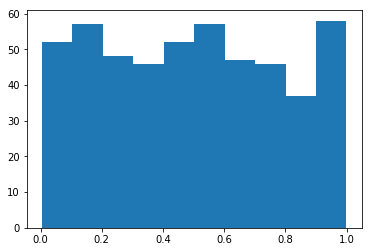

In [2]:
def generate_data(mean_1, mean_2, samples):
    return norm.rvs(loc=mean_1, size=samples), norm.rvs(loc=mean_2, size=samples)

def test_p_val_distribution(mean_1, mean_2, samples, tests):
    p_val_list = []
    for _ in range(0, tests):
        _, p_val = ttest_ind(*generate_data(mean_1, mean_2, samples))
        p_val_list.append(p_val)
    
    plt.hist(p_val_list)
    plt.show()
    
test_p_val_distribution(1, 1, 5, 500)

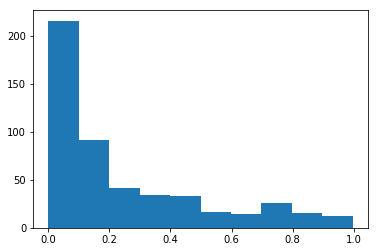

In [3]:
test_p_val_distribution(1, 2, 5, 500)

In [4]:
def generate_data(mean_1, mean_2, samples):
    return norm.rvs(loc=mean_1, size=samples, random_state=42), \
           norm.rvs(loc=mean_2, size=samples, random_state=66)

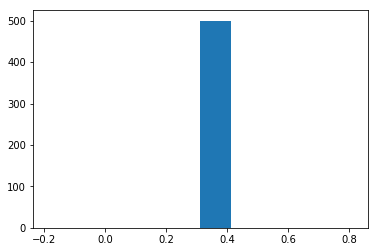

In [14]:
test_p_val_distribution(1, 1, 5, 500)

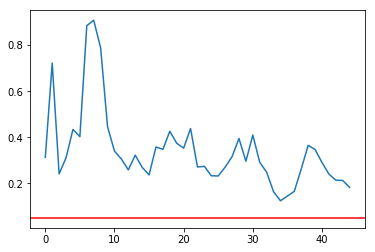

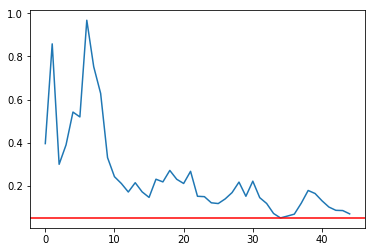

15 0.045950562509201404 -2.088657061474812
	1.0103485243333366 1.3711228565555191
	1.9448302343418513 1.3711228565555191


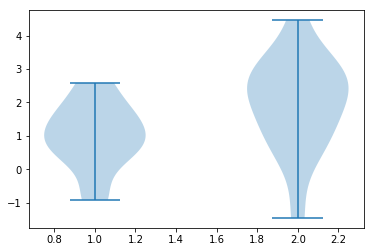

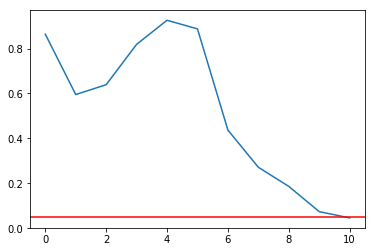

In [5]:
def increase_samples(mean_1, mean_2, from_samples, to_samples):
    p_val_list = []
    for samples in range(from_samples, to_samples):
        stat_val, p_val = ttest_ind(*generate_data(mean_1, mean_2, samples))
        p_val_list.append(p_val)
        if p_val < 0.05:
            data_1, data_2 = generate_data(mean_1, mean_2, samples)
            print samples, p_val, stat_val
            print '\t', np.mean(data_1), np.std(data_2)
            print '\t', np.mean(data_2), np.std(data_2)
            plt.violinplot((data_1, data_2))
            plt.show()
            break

    plt.plot(p_val_list)
    plt.axhline(0.05, c='r')
    plt.show()
    
increase_samples(1, 1, 5, 50)
increase_samples(1, 1.1, 5, 50)
increase_samples(1, 1.5, 5, 50)

In [13]:
def generate_data(mean_1, mean_2, samples, random_seed_1, random_seed_2):
    data_1 = norm.rvs(loc=mean_1, scale=1, size=samples, random_state=random_seed_1)
    data_2 = norm.rvs(loc=mean_2, scale=1, size=samples, random_state=random_seed_2)
    return data_1, data_2


def percentage_hits_significance(mean_1, mean_2, from_samples, to_samples, repeats=100):
    list_sig = []
    walks = []
    effects = []
    for repeat in range(repeats):
        pre_p_val_hit = True
        while pre_p_val_hit:
            seed_1, seed_2 = np.random.randint(0, 2**31-1, size=(2,))
            _, pre_p_val = ttest_ind(*generate_data(mean_1, mean_2, from_samples, seed_1, seed_2))
            pre_p_val_hit = pre_p_val < 0.05
        sig_achieved = False
        # print seed_1, seed_2
        walk = []
        for samples in range(from_samples, to_samples):
            stat_val, p_val = ttest_ind(*generate_data(mean_1, mean_2, samples, seed_1, seed_2),
                                        equal_var=False)
            walk.append(stat_val)
            if p_val < 0.05:
                sig_achieved = True
                data1, data2 = generate_data(mean_1, mean_2, samples, seed_1, seed_2)
                effects.append((np.mean(data1)-np.mean(data2))/np.sqrt((np.std(data1)**2+np.std(
                    data2)**2)/2))
                break
        walks.append(walk)
        list_sig.append(sig_achieved)
    
    # for walk in walks:
    #     plt.plot(walk, c='k')
    # plt.axhline(0.05, c='r')
    # plt.show()
    # 
    # print walks
    # print effects
    print np.sqrt(np.mean(np.power(effects, 2)))
    print np.mean(np.array(list_sig).astype(np.float))
    
    
percentage_hits_significance(0, 0, 5, 30, 500)
percentage_hits_significance(0, .1, 5, 30, 500)
percentage_hits_significance(0., 1., 5, 30, 500)



1.0604184686864582
0.156


1.0878215770728183
0.172


1.1592876200523592
0.962


In [14]:
percentage_hits_significance(0, .1, 5, 100, 500)
percentage_hits_significance(0., 1., 5, 100, 500)


0.8056362249021531
0.352


1.1226887253396796
1.0
